Import flu dataset into Postgress
Do EDA

In terminal:
conda activate metis

conda install -c anaconda pandasql

# installs postgres 
brew install postgresql
#now that this is done, won't have to do it again unless need to update.

# start postgres so it "listens" to connections
brew services start postgres



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
# There is a bug in matplotlib. You cannot set the rc parameters in the same
# cell that you use the "%matplotlib inline" magic command
plt.style.use('ggplot')
plt.rc('font', size=18)

In [14]:
df_flu_train1 = pd.read_csv('./Flu_Shot_Training_Features.csv')
#It loaded! data file needed to be in same folder as notebook, and in same environment
#with all packages installed in that environment

In [15]:
df_flu_train1.head(120)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,3.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,NaN,Not Married,Rent,Not in Labor Force,kbazzjca,"MSA, Not Principle City",0.0,0.0,NaN,NaN
116,116,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,0.0,phxvnwax,mxkfnird
117,117,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Own,Unemployed,lrircsnp,"MSA, Principle City",1.0,0.0,NaN,NaN
118,118,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea


In [16]:
df_flu_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

There are some features for which there are many fewer responses than the overall survey: the two employment features, and also the health insurance feature. Looking at the CSV file I can see that most of the respondents who answered this question said that they do have health insurance, leading me to wonder whether the non-respondents were mostly people without health insurance (this survey was conducted in 2009, before passage of the ACA). The responses in the health insurance feature could be skewed for this reason. I propose to eliminate the health insurance column and the two employment columns, eliminate rows that have null/NaN values, and then check the dataframe to see how many complete responses remain.

In [17]:
#load the data for the training labels, ie the targets for each respondent: 
#whether they did or did not take the seasonal or H1N1 flu vaccine (yes=1, no=0).
#All 27607 respondents responded to this question.
df_flu_train2 = pd.read_csv('./Flu_Shot_Training_Labels.csv')

In [18]:
df_flu_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [27]:
#need to merge these two dataframes together on the respondent_id column
df_flu_train3=df_flu_train1.merge(df_flu_train2)

In [28]:
df_flu_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [29]:
#The resulting dataframe is df_flu_train3, with all of the features including y/n for the vaccines
#and merged on the respondent_id
df_flu_train3

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0


In [30]:
#Save the complete dataframe as a csv file, df_flu_train_complete.csv. 
df_flu_train3.to_csv('df_flu_train_complete.csv')

In [33]:
#Remove the following columns: health_insurance, employment_industry, employment_occupation
#Many fewer respondents answered these questions. The survey was taken before the Affordable
#Care Act was passed; it will be difficult to impute whether or not respondents have health insurance.
#Also, there many categories for the employment questions: 22 for Industry and 23 for Occupation.
df_flu_train3.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], inplace=True)

In [34]:
df_flu_train3

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0,0


In [35]:
df_flu_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [36]:
#save dataframe of training data without health_insurance, employment_industry, employment_occupation columns
df_flu_train3.to_csv('df_flu_train_clean1.csv')

In [39]:
#Try dropping all of the rows w NaNs, now that the columns health_insurance, employment_industry,
# and employment_occupation have been omitted. Don't do inplace for now
df_flu_train3.dropna(axis=0, inplace=True)

In [40]:
#still seem to have 19,642 rows without NaNs. This might be enough.
df_flu_train3

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Principle City",1.0,0.0,0,1
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0


In [41]:
df_flu_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   h1n1_concern                 19642 non-null  float64
 2   h1n1_knowledge               19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_h1n1             19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_mo

In [ ]:
#non-numerical features: age_group, education, race, sex, income_poverty, marital_status, rent_or_own,
#employment_status, hhs_geo_region, census_msa

In [ ]:
#All features
#'respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
#'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 
#'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
#'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 
#'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
#'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 
#'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 
#'census_msa', 'household_adults', 'household_children'


In [42]:
#Save this dataframe to a csv file. This is a dataset with no NaNs, and with the health_insurance,
#employment_industry, and employment_occupation columns removed
df_flu_train3.to_csv('df_flu_train_clean_noNaNs.csv')

In [ ]:
#All features
#'respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
#'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 
#'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
#'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 
#'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
#'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 
#'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 
#'census_msa', 'household_adults', 'household_children'

#non-numerical features: age_group, education, race, sex, income_poverty, marital_status, rent_or_own,
#employment_status, hhs_geo_region, census_msa

#targets: 'h1n1_vaccine', 'seasonal_vaccine'

#taken out earlier: 'health_insurance', occupation columns

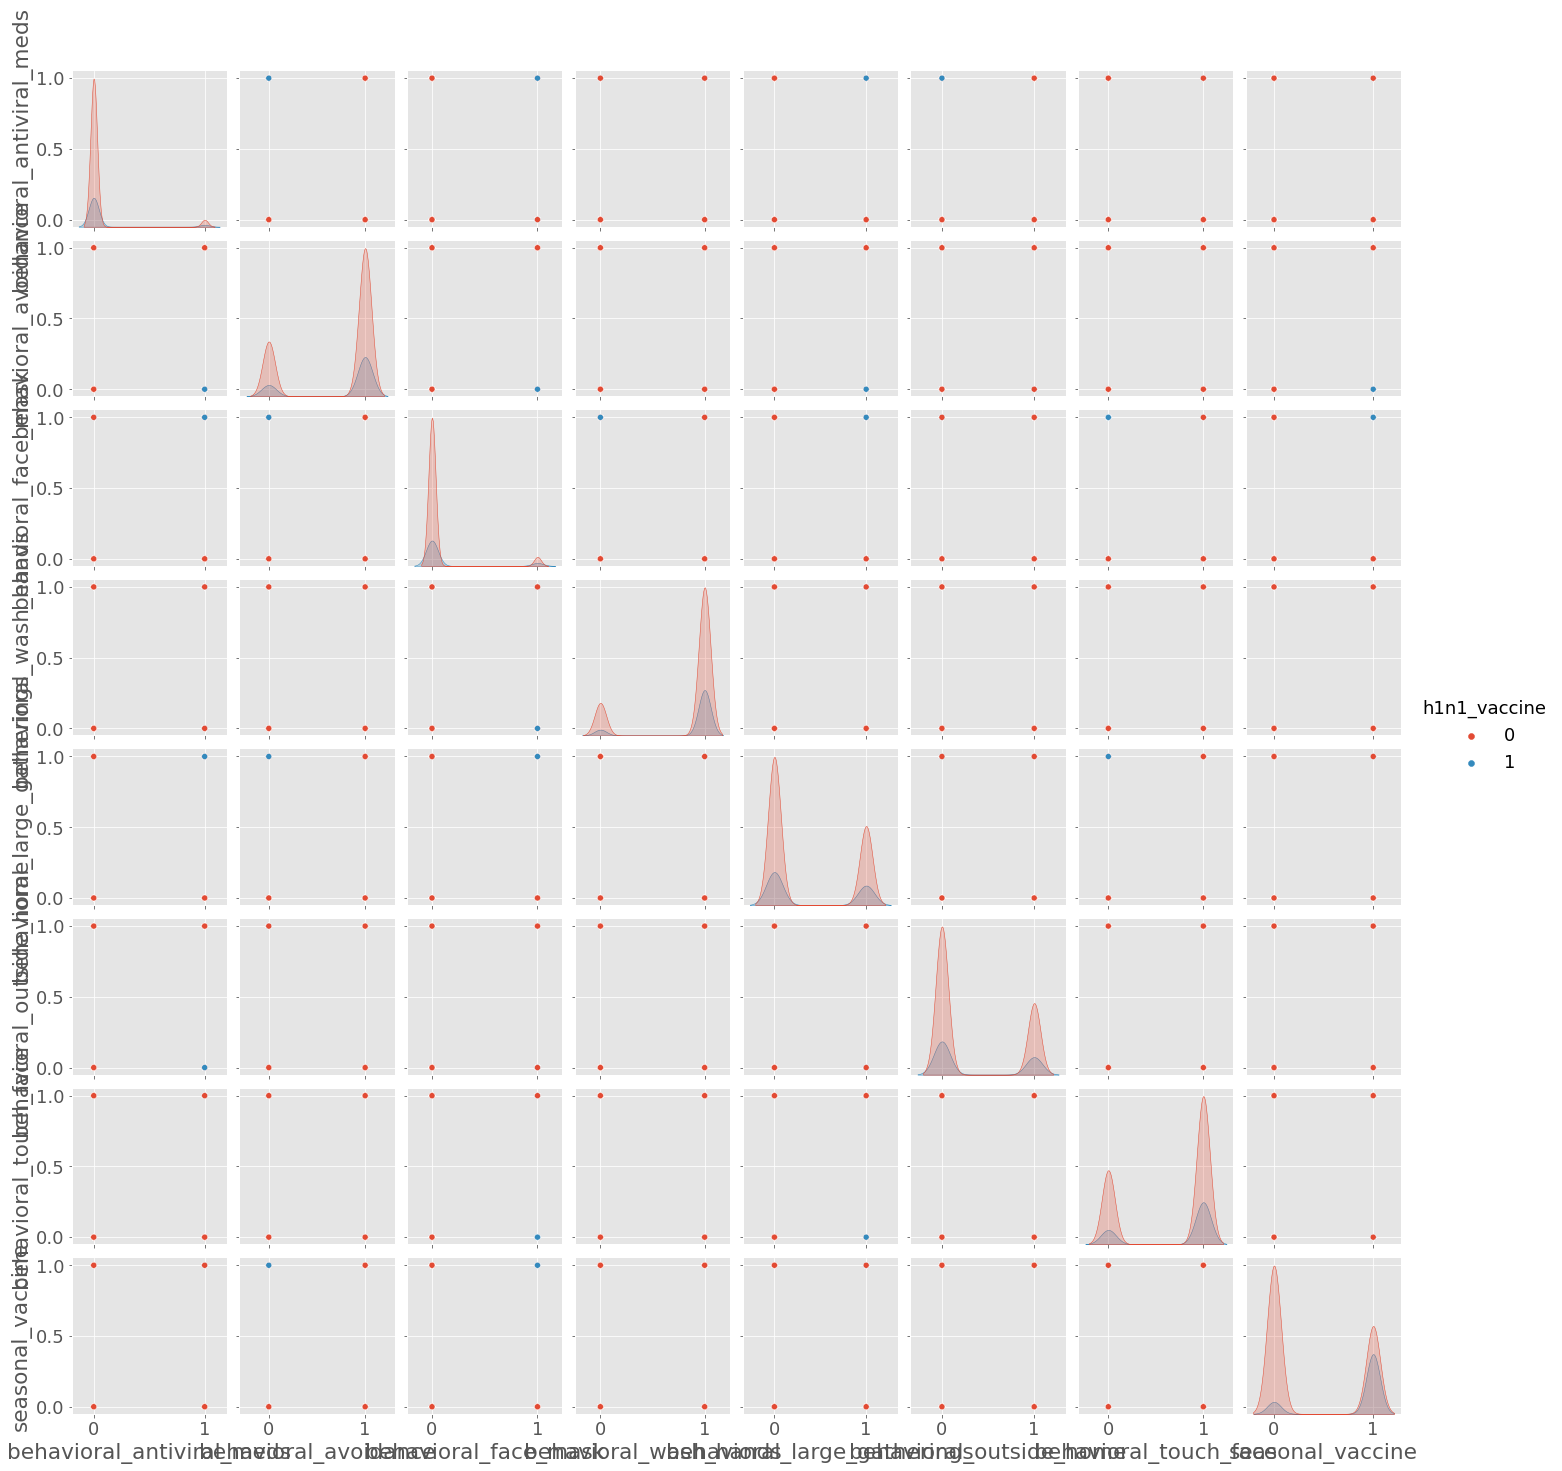

In [50]:
#pairplot w only the behavioral features
sns.pairplot (df_flu_train3.drop(columns=['h1n1_concern', 'h1n1_knowledge', 'respondent_id','doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 
'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 
'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 
'census_msa', 'household_adults', 'household_children']), hue='h1n1_vaccine')

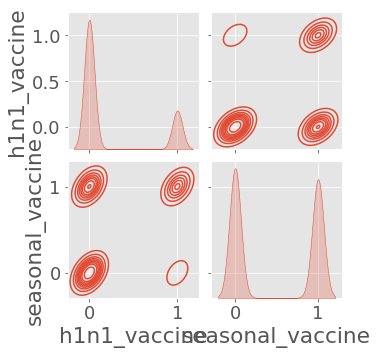

In [59]:
#that pairplot doesn't show much, so do two features or labels at a time as a kde plot.
sns.pairplot (df_flu_train3, vars=['h1n1_vaccine', 'seasonal_vaccine'], kind='kde')

No handles with labels found to put in legend.


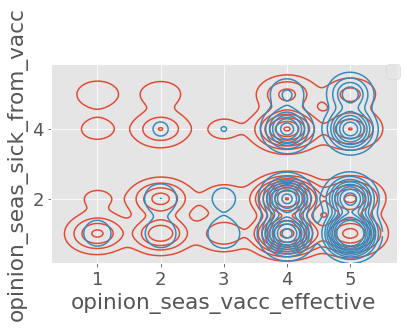

In [103]:
sns.kdeplot(data=df_flu_train3, x='opinion_seas_vacc_effective', y='opinion_seas_sick_from_vacc', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
#plt.title("Seaborn Plot with Legend Outside")
plt.tight_layout()
#plt.savefig("place_legend_outside_plot_Seaborn_scatterplot.png",
                    #format='png',dpi=150)

No handles with labels found to put in legend.


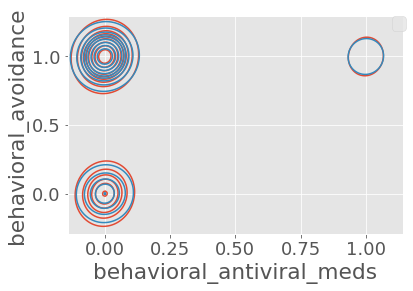

In [104]:
sns.kdeplot(data=df_flu_train3, x='behavioral_antiviral_meds', y='behavioral_avoidance', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


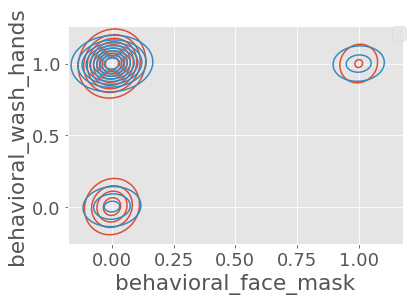

In [102]:
sns.kdeplot(data=df_flu_train3, x='behavioral_face_mask', y='behavioral_wash_hands', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


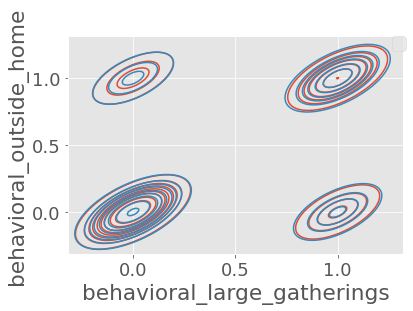

In [95]:
sns.kdeplot(data=df_flu_train3, x='behavioral_large_gatherings', y='behavioral_outside_home', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0) #gets rid of the legend. blue=seasonal_vaccine

No handles with labels found to put in legend.


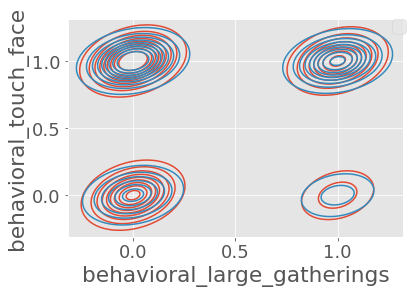

In [97]:
sns.kdeplot(data=df_flu_train3, x='behavioral_large_gatherings', y='behavioral_touch_face', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


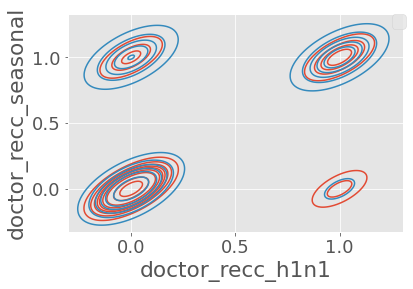

In [99]:
sns.kdeplot(data=df_flu_train3, x='doctor_recc_h1n1', y='doctor_recc_seasonal', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


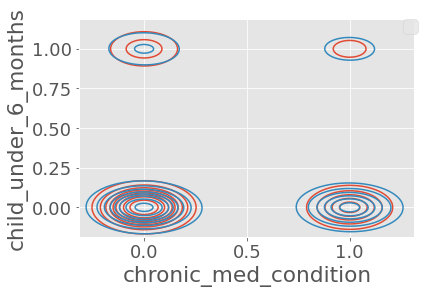

In [100]:
sns.kdeplot(data=df_flu_train3, x='chronic_med_condition', y='child_under_6_months', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


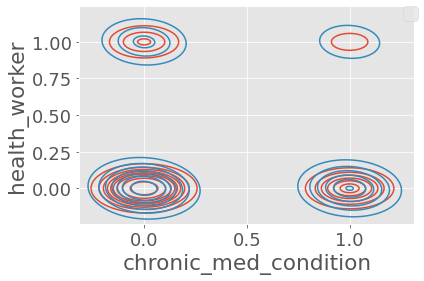

In [101]:
sns.kdeplot(data=df_flu_train3, x='chronic_med_condition', y='health_worker', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


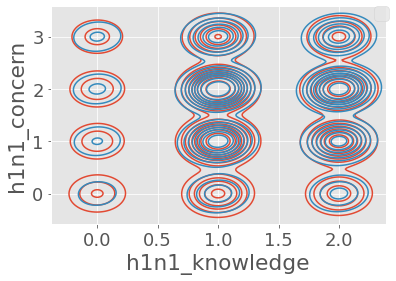

In [105]:
sns.kdeplot(data=df_flu_train3, x='h1n1_knowledge',y='h1n1_concern', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)##seasonal vaccine

No handles with labels found to put in legend.


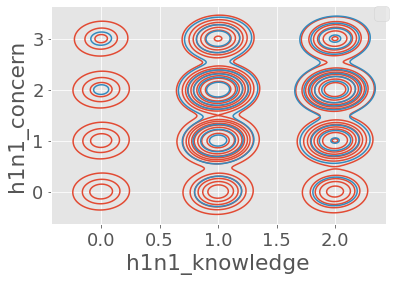

In [107]:
sns.kdeplot(data=df_flu_train3, x='h1n1_knowledge',y='h1n1_concern', hue='h1n1_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)##h1n1_vaccine is blue

No handles with labels found to put in legend.


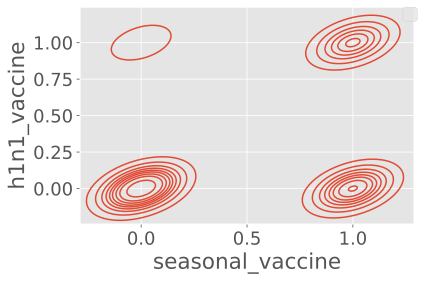

In [161]:
sns.kdeplot(data= df_flu_train3, y='h1n1_vaccine', x='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


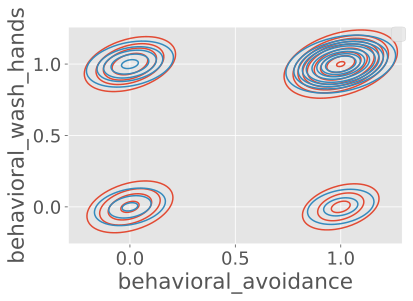

In [162]:
sns.kdeplot(data=df_flu_train3, x='behavioral_avoidance', y='behavioral_wash_hands', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

No handles with labels found to put in legend.


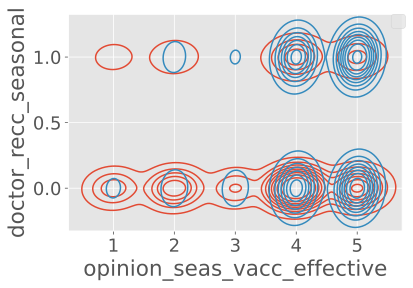

In [163]:
sns.kdeplot(data=df_flu_train3, x='opinion_seas_vacc_effective', y='doctor_recc_seasonal', hue='seasonal_vaccine')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
#I made some violin plots, but they weren't all that helpful for EDA.

<AxesSubplot:xlabel='age_group', ylabel='seasonal_vaccine'>

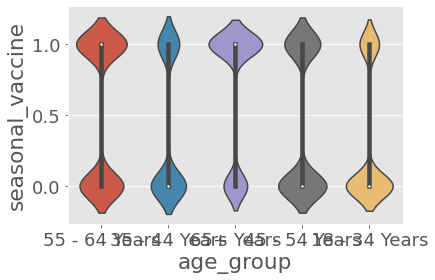

In [118]:
sns.violinplot(data=df_flu_train3, scale='count', x='age_group', y='seasonal_vaccine')
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)##seasonal_vaccine is blue

<AxesSubplot:xlabel='education', ylabel='seasonal_vaccine'>

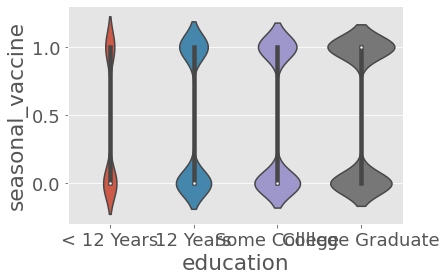

In [119]:
sns.violinplot(data=df_flu_train3, scale='count', x='education', y='seasonal_vaccine')

<AxesSubplot:xlabel='race', ylabel='seasonal_vaccine'>

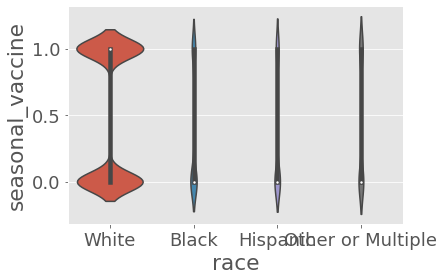

In [120]:
sns.violinplot(data=df_flu_train3, scale='count', x='race', y='seasonal_vaccine')

<AxesSubplot:xlabel='sex', ylabel='seasonal_vaccine'>

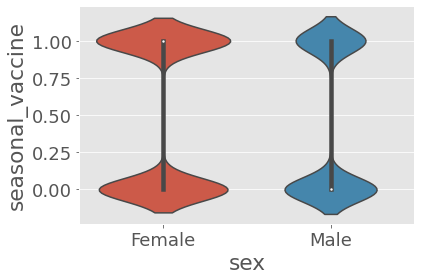

In [121]:
sns.violinplot(data=df_flu_train3, scale='count', x='sex', y='seasonal_vaccine')

<AxesSubplot:xlabel='income_poverty', ylabel='seasonal_vaccine'>

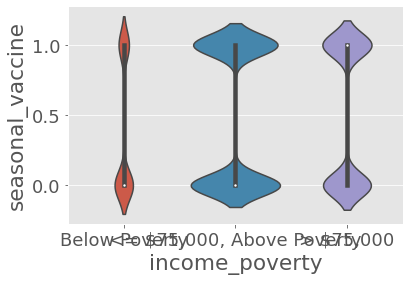

In [122]:
sns.violinplot(data=df_flu_train3, scale='count', x='income_poverty', y='seasonal_vaccine')

<AxesSubplot:xlabel='marital_status', ylabel='seasonal_vaccine'>

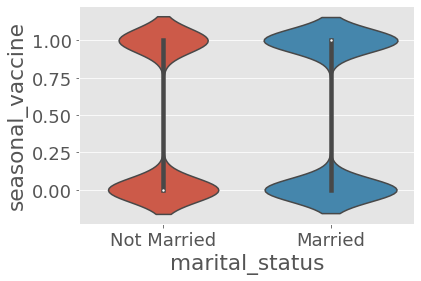

In [123]:
sns.violinplot(data=df_flu_train3, scale='count', x='marital_status', y='seasonal_vaccine')

<AxesSubplot:xlabel='rent_or_own', ylabel='seasonal_vaccine'>

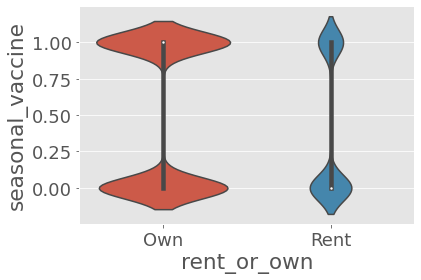

In [124]:
sns.violinplot(data=df_flu_train3, scale='count', x='rent_or_own', y='seasonal_vaccine')

<AxesSubplot:xlabel='employment_status', ylabel='seasonal_vaccine'>

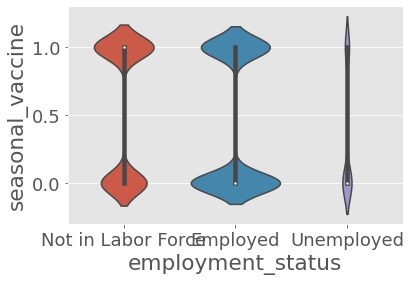

In [125]:
sns.violinplot(data=df_flu_train3, scale='count', x='employment_status', y='seasonal_vaccine')

<AxesSubplot:xlabel='household_adults', ylabel='seasonal_vaccine'>

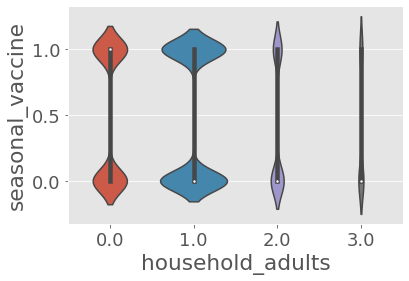

In [126]:
sns.violinplot(data=df_flu_train3, scale='count', x='household_adults', y='seasonal_vaccine')

<AxesSubplot:xlabel='household_children', ylabel='seasonal_vaccine'>

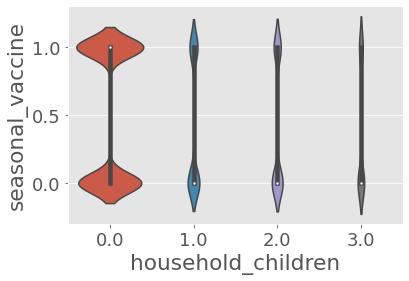

In [127]:
sns.violinplot(data=df_flu_train3, scale='count', x='household_children', y='seasonal_vaccine')

In [ ]:
#features that seem to correlate w seasonal vaccine: age group, h1n1_knowledge and h1n1_concern,
#opinion_seas_vacc_effective, behavioral_avoidance, behavioral_wash_hands, behavioral_outside_home (?), 
#behavioral_touch_face

Project update/MVP
Project: Prediction of the Likelihood that an Individual will Receive their H1N1 and Seasonal Flu Vaccines.
MVP update:
    Downloaded training data (26707 records), did some preliminary EDA.
    Data cleaning: eliminated 3 features based on large numbers of null values, leaving 30 features
    Eliminated rows with NaNs, leaving 19642 records.
    More EDA/visualization; determination of features that have largest effects on the target.
    Next steps: check class imbalances, first pass at logistic regression model.
    

In [ ]:
#Below, I played around with some models. The main work I did on Decision Tree, 
#Random Forest, Logistic Regression, and Naive Bayes Bernoulli is in separate notebooks.

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from collections import Counter

# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [129]:
# From the Class Imbalance notebook
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

# prints confusion matrix as a heatmap which is nicer to visaulize

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [144]:
#train-validation split, stratify (because the h1n1_vaccine target is imbalanced),
#but also do this with the seasonal_vaccine target
#This is the train-validation split for the seasonal_vaccine target,  leaving out h1n1_vaccine:
X_train, X_validation, y_train, y_validation = train_test_split(df_flu_train3.iloc[:, 1:33], df_flu_train3.iloc[:, 34:35], 
                                                    test_size = 0.2, random_state=42, stratify=df_flu_train3.iloc[:, 34:35])

In [145]:
train_df=X_train.copy()
train_df['seasonal_vaccine']=y_train

#train_df['behavioral_wash_hands'] dont think I need this


In [152]:
lm1 = LogisticRegression(solver= 'liblinear', C=1000)
lm1.fit(X_train[['behavioral_wash_hands']], y_train['seasonal_vaccine'])

LogisticRegression(C=1000, solver='liblinear')

In [153]:
lm1.score(X_train[['behavioral_wash_hands']], y_train['seasonal_vaccine'])

0.5287978107299688

In [154]:
#use two features in the model
#X_train = train_df[['behavioral_wash_hands', 'h1n1_knowledge']]
#X_train_scaled = std_scale.fit_transform(X_train)

lm3 = LogisticRegression(solver='liblinear', C=1000)
lm3.fit(X_train[['behavioral_wash_hands', 'h1n1_knowledge']], y_train['seasonal_vaccine'])

LogisticRegression(C=1000, solver='liblinear')

In [155]:
lm3.score(X_train[['behavioral_wash_hands', 'h1n1_knowledge']], y_train['seasonal_vaccine'])

0.5725195697829822

In [156]:
lm4 = LogisticRegression(solver='liblinear', C=1000)
lm4.fit(X_train[['behavioral_wash_hands', 'h1n1_knowledge', 'h1n1_concern']], y_train['seasonal_vaccine'])

LogisticRegression(C=1000, solver='liblinear')

In [157]:
lm4.score(X_train[['behavioral_wash_hands', 'h1n1_knowledge', 'h1n1_concern']], y_train['seasonal_vaccine'])

0.5861388659072105

In [158]:
lm5 = LogisticRegression(solver='liblinear', C=1000)
lm5.fit(X_train[['behavioral_wash_hands', 'h1n1_knowledge', 'h1n1_concern', 'opinion_seas_vacc_effective']], y_train['seasonal_vaccine'])

LogisticRegression(C=1000, solver='liblinear')

In [159]:
lm5.score(X_train[['behavioral_wash_hands', 'h1n1_knowledge', 'h1n1_concern', 'opinion_seas_vacc_effective']], y_train['seasonal_vaccine'])

0.6844014510278114

In [160]:
lm5.coef_, lm5.intercept_

(array([[0.26475424, 0.35741752, 0.21046233, 0.84925342]]),
 array([-4.6448257]))

In [165]:

import statsmodels.api as sm

In [169]:
lm_1 = sm.Logit(y_train['seasonal_vaccine'],  # with statsmodels, `y` comes first
                sm.add_constant(X_train[['behavioral_wash_hands']]))  # and then `x`
lm_1 = lm_1.fit()

Optimization terminated successfully.
         Current function value: 0.685201
         Iterations 4


In [170]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       seasonal_vaccine   No. Observations:                15713
Model:                          Logit   Df Residuals:                    15711
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                 0.01007
Time:                        23:12:49   Log-Likelihood:                -10767.
converged:                       True   LL-Null:                       -10876.
Covariance Type:            nonrobust   LLR p-value:                 1.387e-49
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6333      0.041    -15.390      0.000      -0.714      -0.553
behavioral_wash_hands     0.6495      0.045     14.528      0.000       0.562       0.737
=========================================================================================
"""

In [171]:
# By default, LogisticRegression will fit an intercept, as we did with statsmodels
lm_2 = LogisticRegression(solver='newton-cg',  # For comparison, use the same solver as statsmodels default
                          C=100000)  # No regularization

lm_2.fit(X_train[['behavioral_wash_hands']], y_train['seasonal_vaccine'])

LogisticRegression(C=100000, solver='newton-cg')

In [172]:
# We can see that the coefficient in question matches the one from statsmodels
print('intercept: ', round(lm_2.intercept_[0], 4))
print('behavioral_wash_hands: ', round(lm_2.coef_[0][0], 4))

intercept:  -0.6333
behavioral_wash_hands:  0.6495


In [181]:
df_train, df_val = train_test_split(df_flu_train3,
                                     test_size = 0.2, random_state=42, stratify=df_flu_train3.iloc[:, 34:35])

In [179]:
#Validation_df=X_validation.copy()
#Validation_df['seasonal_vaccine']=y_validation

In [189]:
df_eval = df_val.copy()
df_eval['pred'] = lm_2.predict(df_val[['behavioral_wash_hands']])
df_eval.loc[:, 'pred'] = df_eval['pred'] #.astype('category')
df_eval['correct_pred'] = df_eval['pred'] == df_eval['seasonal_vaccine']

#Validation_df=X_validation.copy()
#Validation_df['pred'] = lm_2.predict(Validation_df[['behavioral_wash_hands']])
#Validation_df['pred'] = Validation_df['pred'].astype('category')
#Validation_df['correct_pred'] = Validation_df['pred'] == Validation_df['seasonal_vaccine']

#sns.kdeplot(data=df_flu_train3, x='opinion_seas_vacc_effective', y='doctor_recc_seasonal', hue='seasonal_vaccine')
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

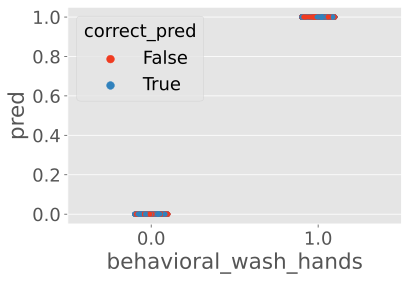

In [194]:
sns.stripplot(data=df_eval,
              x='behavioral_wash_hands',
              y='pred',
              hue='correct_pred',
              palette={False: '#f03b20', True: '#3182bd'});

In [204]:
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

#n_neighbors=15

In [205]:
# big ones: opinion_seas_vacc_eff, behavioral_avoidance, behavioral_wash_hands, behavioral_outside_home (?), 
#behavioral_touch_face

In [206]:
df_flu_train_bin = pd.read_csv('./df_flu_train_binary_num.csv')

In [207]:
df_flu_train_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   respondent_id                19642 non-null  int64
 1   behavioral_antiviral_meds    19642 non-null  int64
 2   behavioral_avoidance         19642 non-null  int64
 3   behavioral_face_mask         19642 non-null  int64
 4   behavioral_wash_hands        19642 non-null  int64
 5   behavioral_large_gatherings  19642 non-null  int64
 6   behavioral_outside_home      19642 non-null  int64
 7   behavioral_touch_face        19642 non-null  int64
 8   doctor_recc_h1n1             19642 non-null  int64
 9   doctor_recc_seasonal         19642 non-null  int64
 10  chronic_med_condition        19642 non-null  int64
 11  child_under_6_months         19642 non-null  int64
 12  health_worker                19642 non-null  int64
 13  h1n1_vaccine                 19642 non-null  i

In [213]:
X=df_flu_train_bin.iloc[:, 1:12]
y=df_flu_train_bin.iloc[:, 13:14]

In [214]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [220]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_val, y_val)))
##this is the accruacy

/Users/amysillman/.conda/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN is
Training:  79.15%
Test set:  77.78%


In [216]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_val, y_val)))

The score for logistic regression is
Training:  78.90%
Test set:  78.47%


/Users/amysillman/.conda/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
